In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV

#models
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_squared_error


from sklearn.preprocessing import StandardScaler

from helper import *

In [73]:
numeric_df = pd.read_csv('../data/train.csv')
#numeric_df.head()

In [74]:
#numeric_df.drop(['Id'], axis=1, inplace=True)
#numeric_df.info()

In [75]:
numeric_df = numeric_df.select_dtypes(include=[np.number])
print(numeric_df.columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [76]:
count_nulls(numeric_df)

,nulls,percent_missing
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479


## Estimating LotFrontage
fill in NA values

In [77]:
LotFrontage_numeric_df = numeric_df.dropna(subset=['LotFrontage'])
LotFrontage_numeric_df.corr()['LotFrontage'].sort_values(ascending=False)[0:6]

LotFrontage     1.000000
1stFlrSF        0.457181
LotArea         0.426095
GrLivArea       0.402797
TotalBsmtSF     0.392075
TotRmsAbvGrd    0.352096
Name: LotFrontage, dtype: float64

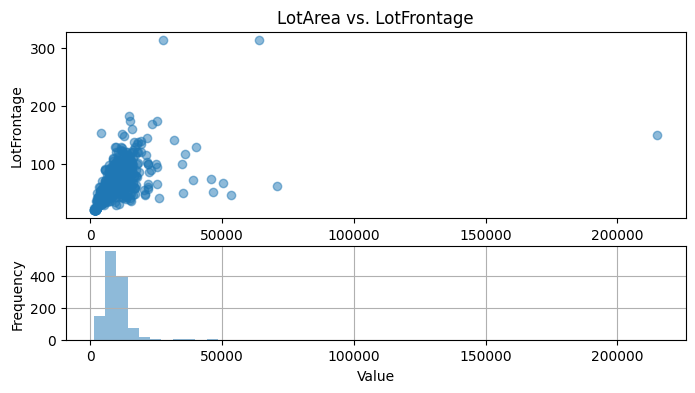

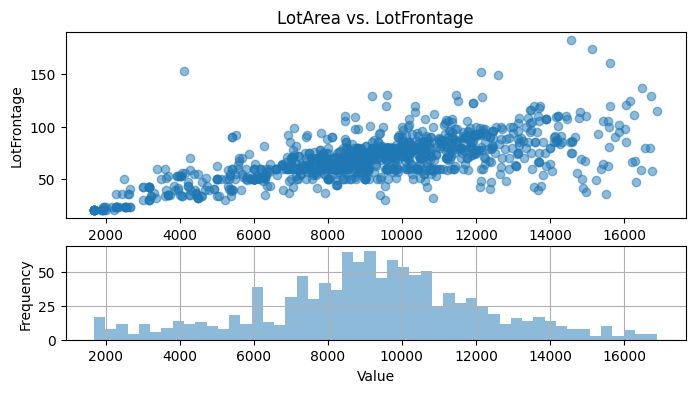

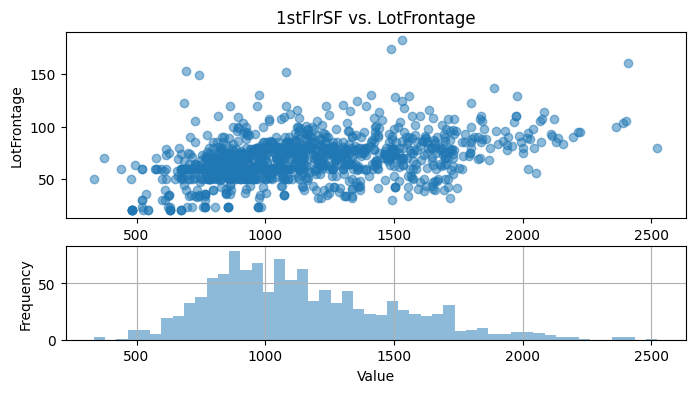

In [78]:
ajr_plot_scatter_volume(LotFrontage_numeric_df, 'LotArea', 'LotFrontage', fig_height=8)

def iqf(data: pd.DataFrame, column: str) -> pd.DataFrame:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return data[(data[column] > lower_bound) & (data[column] < upper_bound)]

LotFrontage_numeric_df = iqf(LotFrontage_numeric_df, 'LotArea')

ajr_plot_scatter_volume(LotFrontage_numeric_df, 'LotArea', 'LotFrontage', fig_height=8)
ajr_plot_scatter_volume(LotFrontage_numeric_df, '1stFlrSF', 'LotFrontage', fig_height=8)
#ajr_plot_scatter_volume(LotFrontage_numeric_df, 'GrLivArea', 'LotFrontage', fig_height=8)
#ajr_plot_scatter_volume(LotFrontage_numeric_df, 'TotalBsmtSF', 'LotFrontage', fig_height=8)

In [79]:
LotFrontage_top_features = numeric_df.corr()['LotFrontage'].sort_values(ascending=False)[1:5].index.to_list()
LotFrontage_top_features

['1stFlrSF', 'LotArea', 'GrLivArea', 'TotalBsmtSF']

In [ ]:
models = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), GradientBoostingRegressor(), AdaBoostRegressor(), BaggingRegressor(), ExtraTreesRegressor(), DecisionTreeRegressor(), KNeighborsRegressor(), SVR()]

scores = {}
for i in tqdm(range(20)):
    for model in models:
        X = LotFrontage_numeric_df[['LotArea', '1stFlrSF', 'GrLivArea', 'TotalBsmtSF']]
        y = LotFrontage_numeric_df['LotFrontage']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = r2_score(y_test, y_pred)
        if model in scores:
            scores[model].append(score)
        else:
            scores[model] = [score]

# Calculate the mean score for each model
mean_scores = {model: np.mean(score_list) for model, score_list in scores.items()}

# Find the model with the highest mean score
best_model = max(mean_scores, key=mean_scores.get)

# Print the mean scores for each model
for model, mean_score in mean_scores.items():
    print(f'{model}: {mean_score}')

best_model, mean_scores[best_model]

100%|██████████| 20/20 [00:05<00:00,  3.82it/s]

LinearRegression(): 0.5215403691414735
Ridge(): 0.5215403691612363
Lasso(): 0.5215384477643406
ElasticNet(): 0.5215394117594159
GradientBoostingRegressor(): 0.5212552541062451
AdaBoostRegressor(): 0.40118466848830814
BaggingRegressor(): 0.4559074129541375
ExtraTreesRegressor(): 0.4965060312225275
DecisionTreeRegressor(): 0.310948902481692
KNeighborsRegressor(): 0.39728698761587217
SVR(): 0.5220860165997548


(SVR(), np.float64(0.5220860165997548))

In [81]:
lot_frontage_model = SVR()
X = LotFrontage_numeric_df[['1stFlrSF', 'LotArea', 'GrLivArea', 'TotalBsmtSF']]
y = LotFrontage_numeric_df['LotFrontage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lot_frontage_model.fit(X_train, y_train)
y_pred = lot_frontage_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R2: {r2}')
print(f'MSE: {mse}')

R2: 0.522086016599755
MSE: 197.8736680680825


In [ ]:
missing_lotfrontage_indices = numeric_df[numeric_df['LotFrontage'].isnull()].index
missing_features = numeric_df.loc[missing_lotfrontage_indices, ['1stFlrSF', 'LotArea', 'GrLivArea', 'TotalBsmtSF']]
predicted_lotfrontage = lot_frontage_model.predict(missing_features)
numeric_df.loc[missing_lotfrontage_indices,'LotFrontage'] = predicted_lotfrontage

Tested with various regression models and combinations of features to predict LotFrontage.

LotFrontage is the linear feet of street connected to the property. It is a continuous variable. It is reasonable to assume that the LotFrontage of a property is related to the LotArea of the property. We can use this relationship to estimate the LotFrontage of properties with missing values.

GarageYrBlt is null because they don't have a garage. We can replace these null values with 0.

In [83]:
count_nulls(numeric_df)

,nulls,percent_missing
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479


## MasVnrArea
fill in NA values. These null values are due to the fact that the property does not have a veneer, leading to null values. No veneer also means square footage of veneer is 0, which is why we can replace these null values with 0.

In [ ]:
numeric_df['MasVnrArea'] = numeric_df['MasVnrArea'].fillna(0)

count_nulls(numeric_df)

,nulls,percent_missing
GarageYrBlt,81,0.055479


In [85]:
numeric_df.to_csv('../new_data/train_cleaned.csv', index=False)

## GarageYrBlt
These null values are due to the fact that the property does not have a garage, leading to null values. 
There is no reasonable replacement since the year the garage was built is not available. These rows must be dropped for regression but kept for other classification models.

In [ ]:
numeric_df = numeric_df.dropna(subset=['GarageYrBlt'])

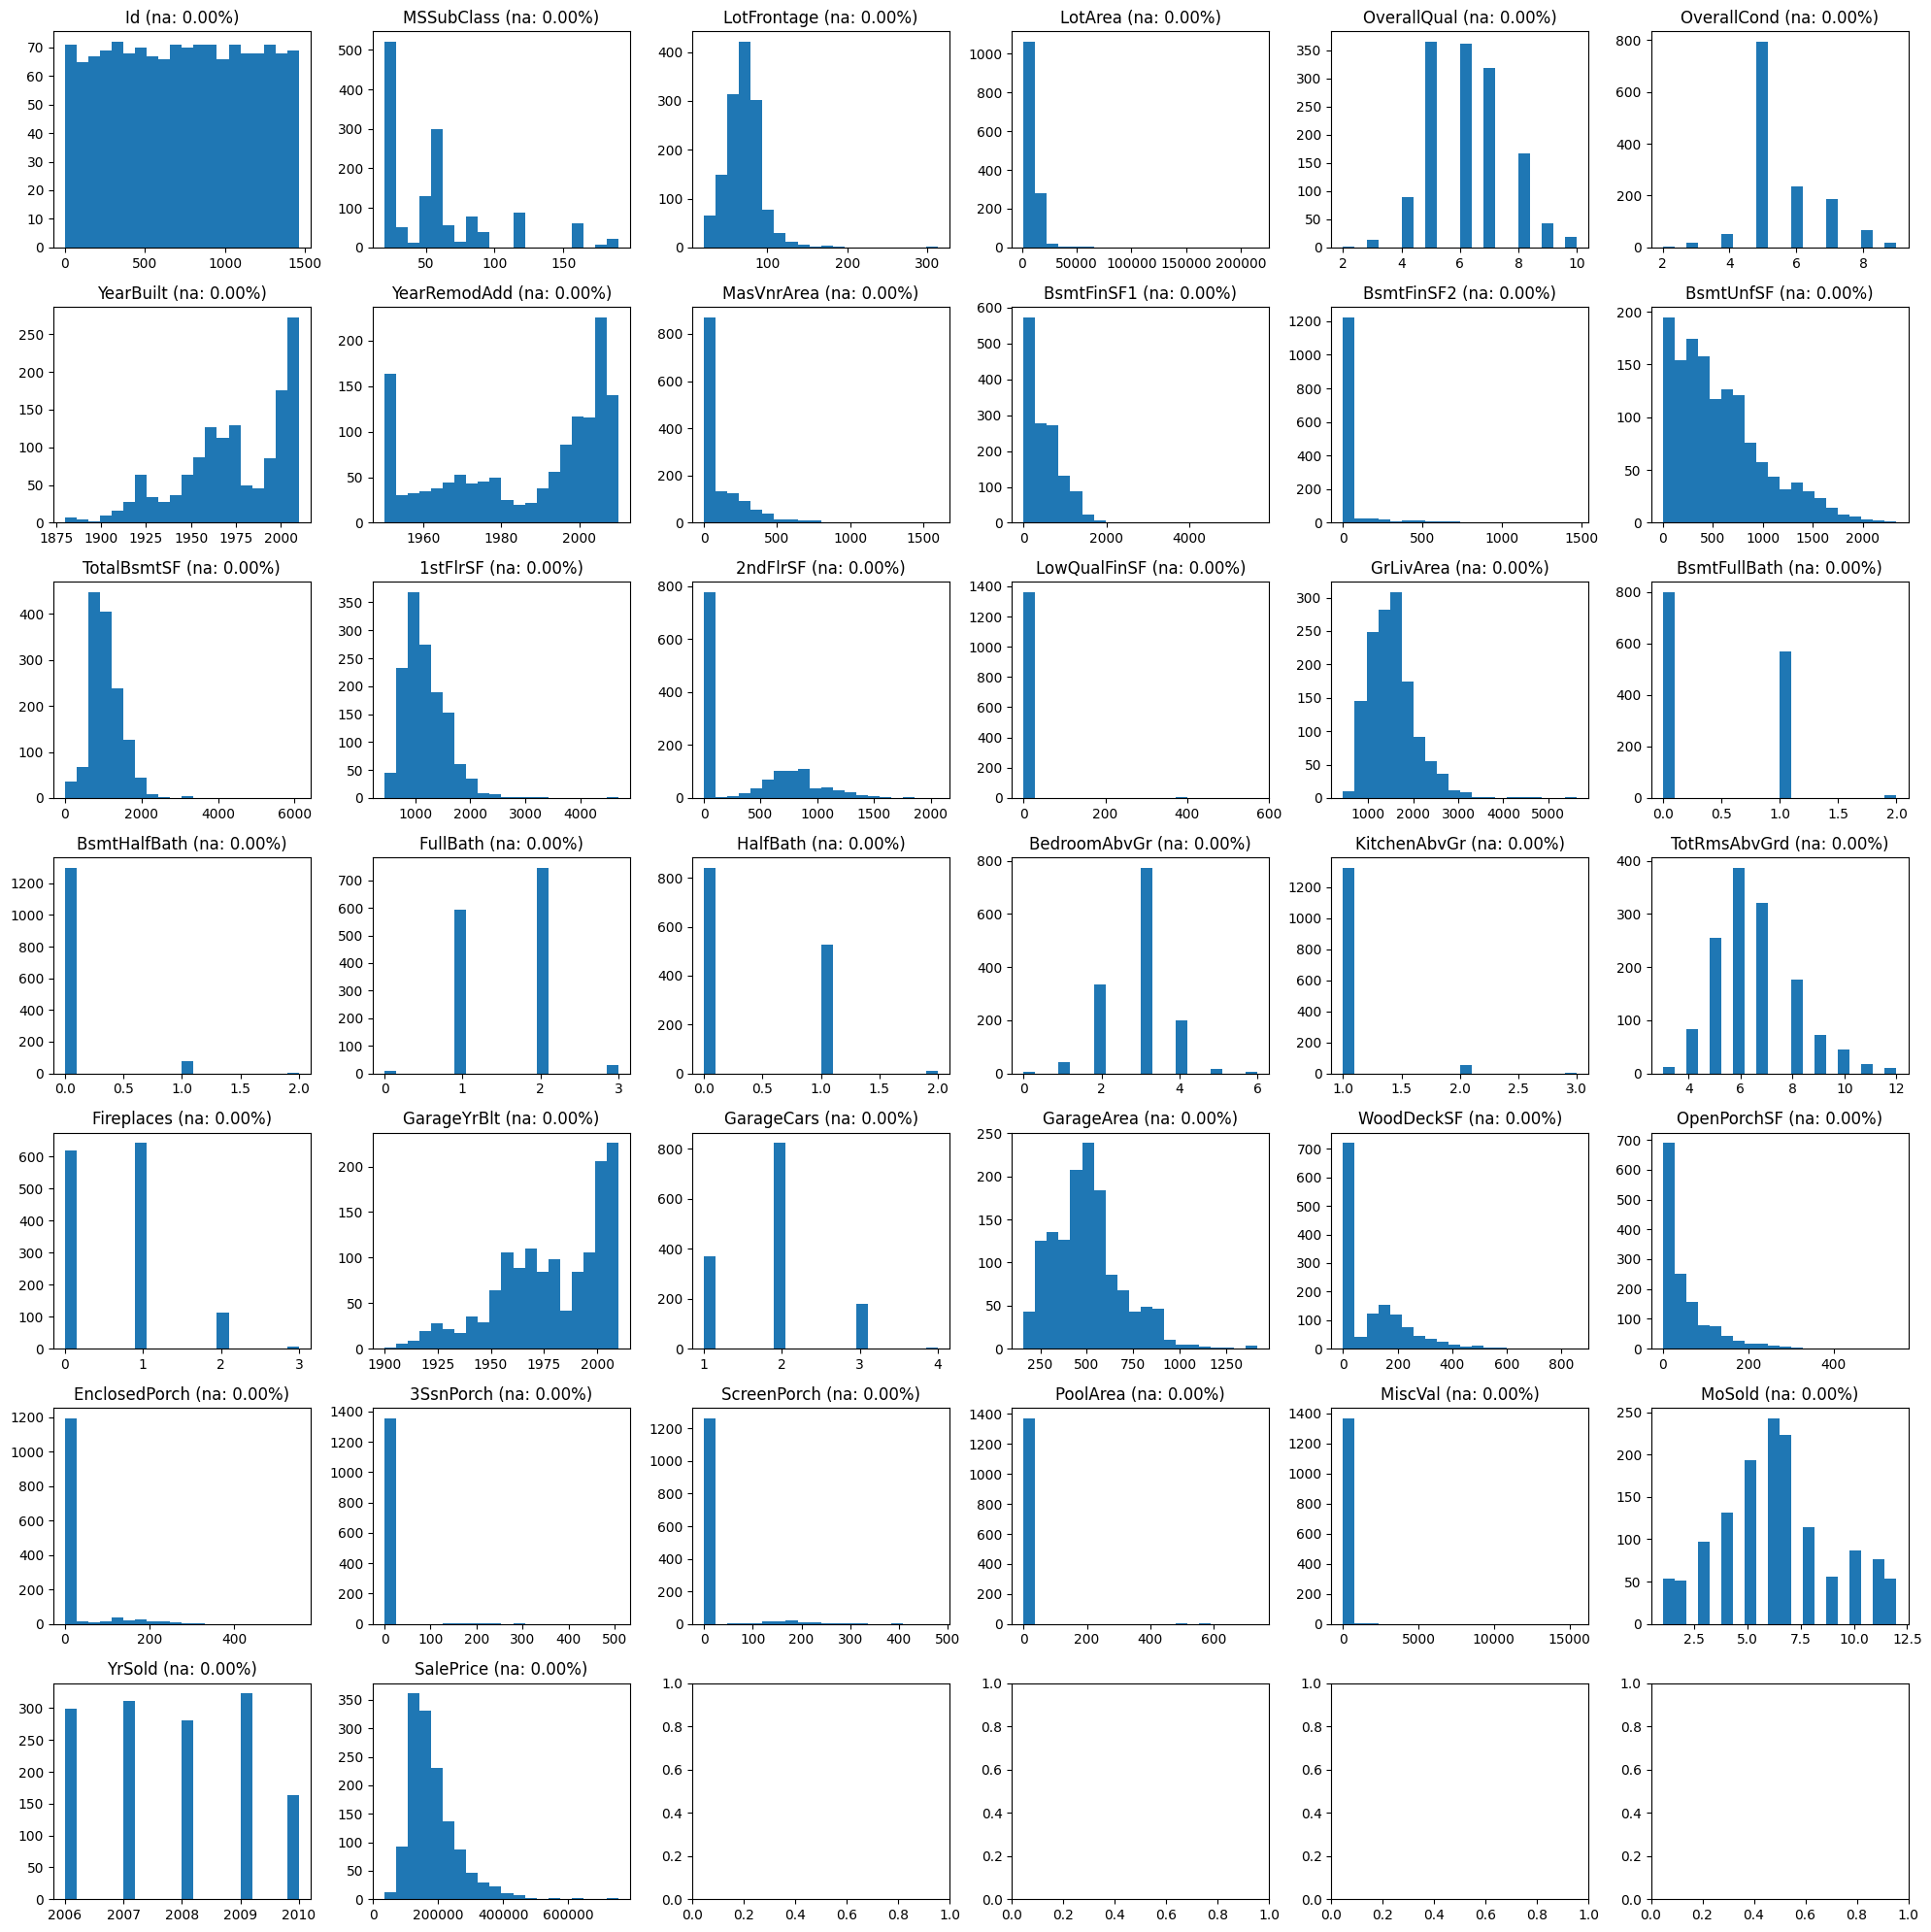

In [87]:
ajr_plot_histograms(numeric_df)

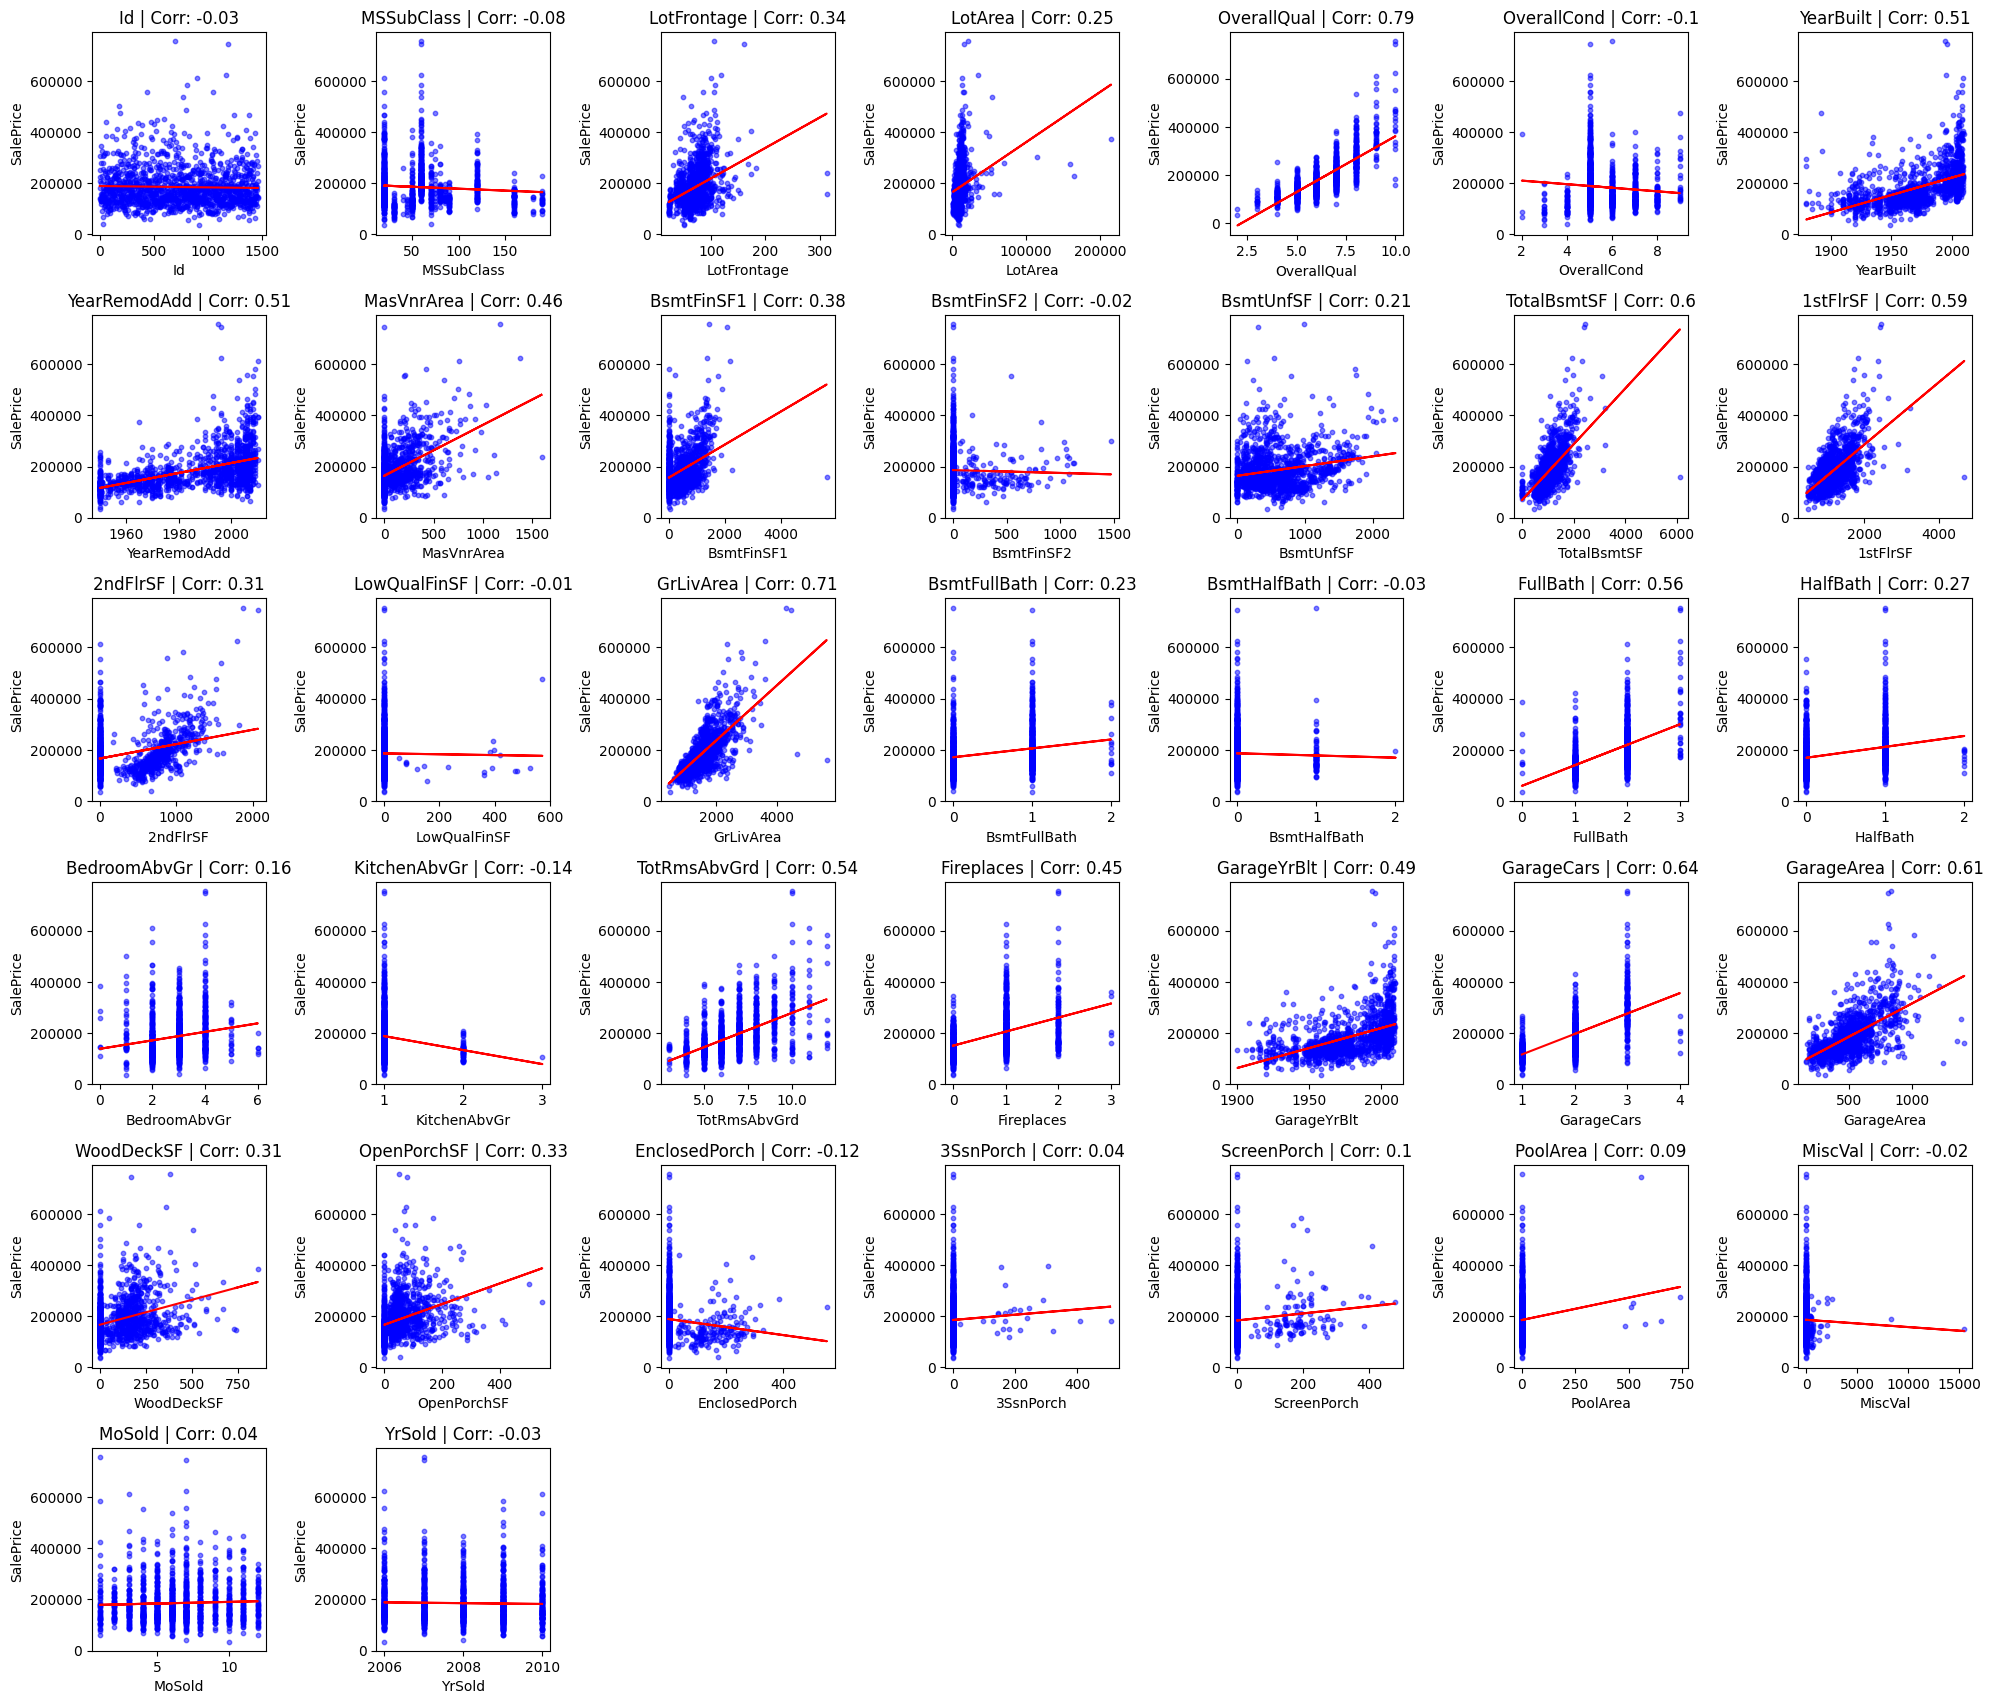

In [88]:
ajr_plot_correlations(numeric_df, 'SalePrice')

/var/folders/0f/cgwjfy6x7xl837z0mt90bnxr0000gn/T/ipykernel_8639/104637676.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


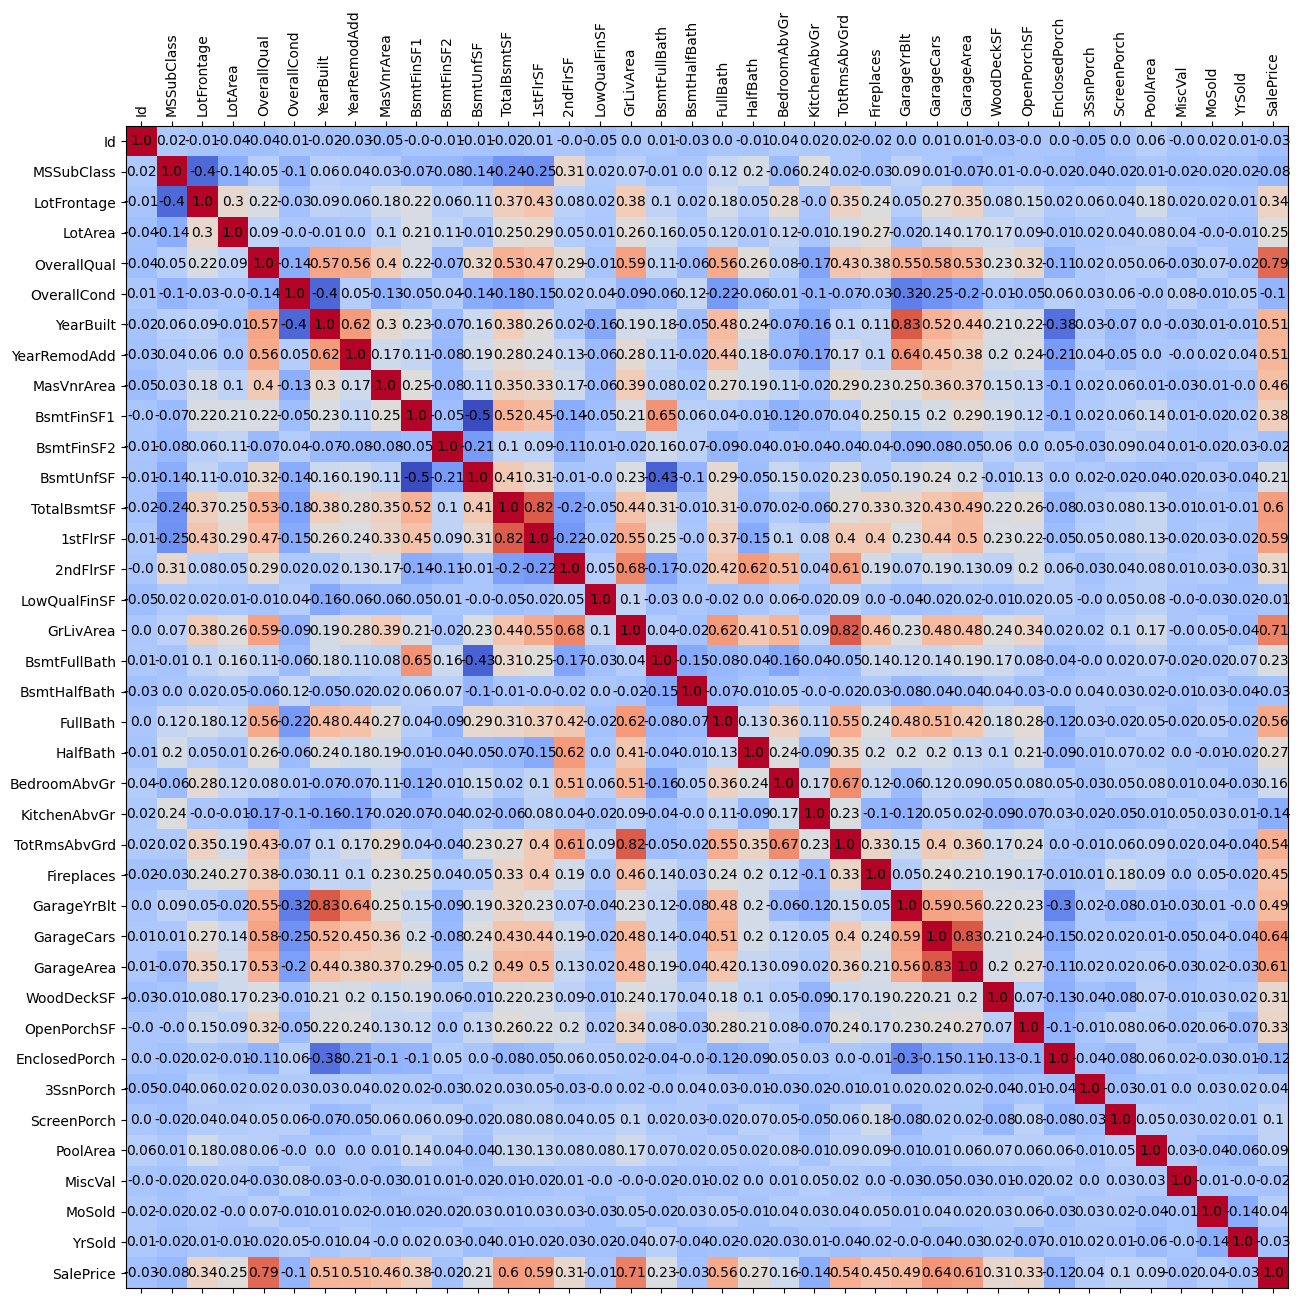

In [89]:
numeric_corr = numeric_df.corr()

def ajr_correlation_plot(corr_numeric_df, fig_height=10):
    column_names = list(corr_numeric_df.columns.values)
    plt.figure(figsize=(fig_height, fig_height))
    plt.matshow(corr_numeric_df, cmap='coolwarm', fignum=1)
    plt.xticks(np.arange(len(column_names)), column_names, rotation=90)
    plt.yticks(np.arange(len(column_names)), column_names)
    plt.tight_layout()
    
    for i in range(len(corr_numeric_df.columns)):
        for j in range(len(corr_numeric_df.columns)):
            plt.text(j, i, f'{round(corr_numeric_df.iloc[i, j], 2)}', ha='center', va='center', color='black')

ajr_correlation_plot(numeric_corr, fig_height=15)

## Creating a model using numerical only features

/var/folders/0f/cgwjfy6x7xl837z0mt90bnxr0000gn/T/ipykernel_8639/104637676.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


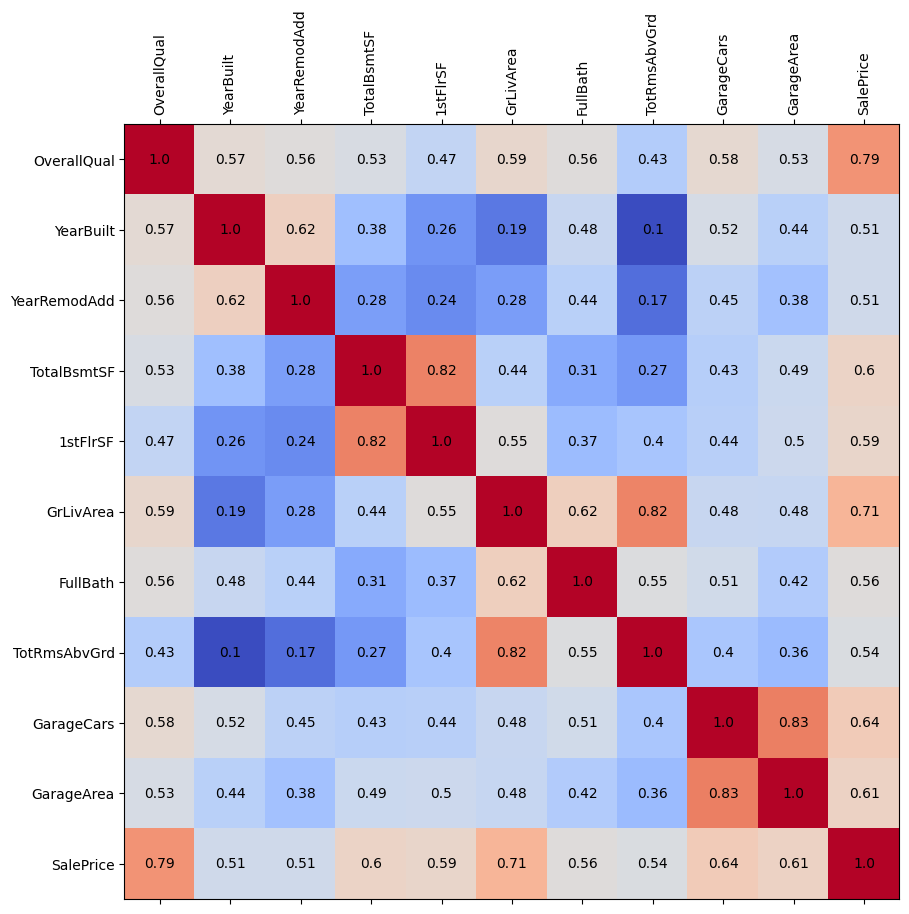

In [90]:
#keep only the features that have a correlation of 0.5 or higher with SalePrice
numeric_corr = numeric_corr['SalePrice']
numeric_corr = numeric_corr[numeric_corr > 0.5]

ajr_correlation_plot(numeric_df[numeric_corr.index].corr())

In [ ]:
X = numeric_df.drop(columns=['SalePrice'])
y = numeric_df['SalePrice']

correlation_matrix = numeric_df.corr()
correlated_features = correlation_matrix['SalePrice'][abs(correlation_matrix['SalePrice']) > 0.5].index
X = X[correlated_features.drop('SalePrice')]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [92]:
param_grids = {
    'Ridge': {'alpha': [0.1, 1, 10, 100]},
    'Lasso': {'alpha': [0.01, 0.1, 1, 10]},
    'ElasticNet': {'alpha': [0.01, 0.1, 1, 10], 'l1_ratio': [0.2, 0.5, 0.8]},
    'RandomForestRegressor': {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]},
    'GradientBoostingRegressor': {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [100, 200]},
    'AdaBoostRegressor': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 1]},
    'BaggingRegressor': {'n_estimators': [10, 50, 100]},
    'ExtraTreesRegressor': {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]},
    'DecisionTreeRegressor': {'max_depth': [None, 10, 20]},
    'KNeighborsRegressor': {'n_neighbors': [3, 5, 10]},
    'SVR': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
}

models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'BaggingRegressor': BaggingRegressor(),
    'ExtraTreesRegressor': ExtraTreesRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'SVR': SVR(),
}

In [93]:
results = {}
best_models = {}

print('Training models... tuning hyperparameters...')
for name, model in tqdm(models.items()):
    grid_search = GridSearchCV(model, param_grids.get(name, {}), cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_rmse = np.sqrt(-grid_search.best_score_)  # RMSE

    results[name] = best_rmse
    best_models[name] = best_model

Training models... tuning hyperparameters...


100%|██████████| 11/11 [00:26<00:00,  2.37s/it]


In [118]:
print('\nModel Performance (RMSE):')
for name, rmse in results.items():
    print(f'{name}: {rmse:.4f}')

print('\nBest Model:')
best_model = best_models[min(results, key=results.get)]
print(f'{best_model}: {results[min(results, key=results.get)]:.4f}')

print(best_model.get_params())


Model Performance (RMSE):
Ridge: 39560.5226
Lasso: 40110.7229
ElasticNet: 39596.8933
RandomForestRegressor: 32113.1592
GradientBoostingRegressor: 32637.7608
AdaBoostRegressor: 37285.5365
BaggingRegressor: 32326.4560
ExtraTreesRegressor: 30222.1108
DecisionTreeRegressor: 42417.1988
KNeighborsRegressor: 33500.4647
SVR: 59844.4548

Best Model:
ExtraTreesRegressor(max_depth=10): 30222.1108
{'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [122]:
feature_importances = zip(X.columns, best_model.feature_importances_)
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

for feature, importance in feature_importances:
    print(f'{feature}: {importance:.4f}')

OverallQual: 0.3108
GarageCars: 0.1905
GrLivArea: 0.1315
FullBath: 0.0883
1stFlrSF: 0.0636
TotalBsmtSF: 0.0588
YearBuilt: 0.0427
GarageArea: 0.0415
YearRemodAdd: 0.0408
TotRmsAbvGrd: 0.0315


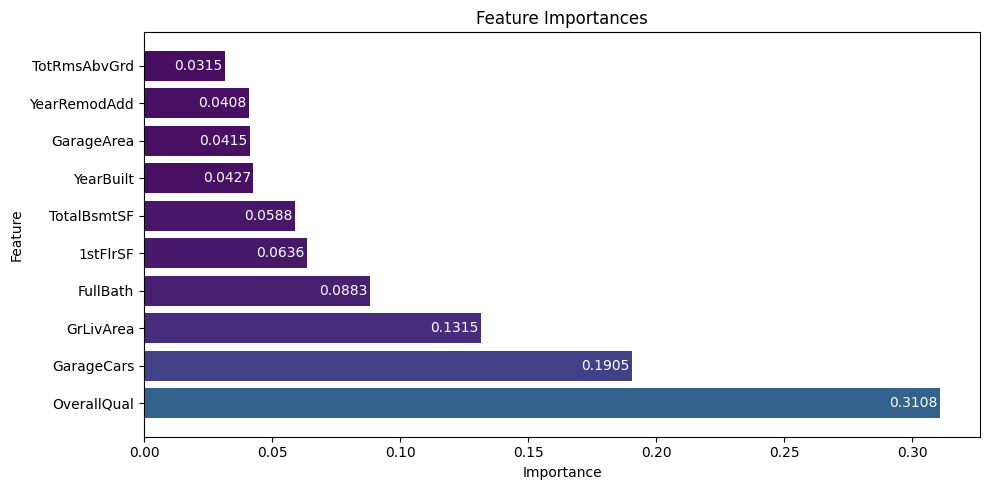

In [143]:
# make feature_importances into bar chart with feature names on y axis and importance on x axis
# add color to the bars and add value of importance to the right of the bar
plt.figure(figsize=(10, 5))

import matplotlib.cm as cm
colors = cm.viridis([x[1] for x in feature_importances])
plt.barh([x[0] for x in feature_importances], [x[1] for x in feature_importances], color=colors)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.tight_layout()

# add the value of the importance to the right of the bar
for i, (feature, importance) in enumerate(feature_importances):
    # offset the text inside the bar slightly with white text
    plt.text(importance - 0.001, i, f'{importance:.4f}', ha='right', va='center', color='white')
    
plt.show()